## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [2]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Wed Dec  8 20:43:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 496.49       Driver Version: 496.49       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   39C    P8     3W /  N/A |    134MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
import os
import keras
from keras.datasets import cifar10

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x/255)*2 -1
    if flatten:
        x = x.reshape(len(x),-1)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.np_utils.to_categorical(y, num_classes)
    return y

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
x_train

array([[-0.5372549 , -0.51372549, -0.50588235, ..., -0.03529412,
        -0.27843137, -0.43529412],
       [ 0.20784314,  0.38823529,  0.46666667, ...,  0.12156863,
         0.04313725,  0.12941176],
       [ 1.        ,  1.        ,  1.        , ..., -0.37254902,
        -0.3254902 , -0.34117647],
       ...,
       [-0.7254902 ,  0.39607843,  0.84313725, ..., -0.90588235,
        -0.75686275, -0.60784314],
       [ 0.48235294,  0.65490196,  0.88235294, ...,  0.52941176,
         0.49019608,  0.34117647],
       [ 0.79607843,  0.79607843,  0.8745098 , ...,  0.27843137,
         0.27843137,  0.2627451 ]])

In [17]:
"""Code Here
建立你的神經網路
"""
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation = 'relu')(input_layer)
    x = keras.layers.Dense(units=256, activation = 'relu')(x)
    x = keras.layers.Dense(units=128, activation = 'relu')(x)
    x = keras.layers.Dense(units=64, activation = 'relu')(x)
    x = keras.layers.Dense(units=32, activation = 'relu')(x)
    out = keras.layers.Dense(units=10, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330 

In [18]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [20]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='Adam')

In [21]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 16ms/step - loss: 1.7264 - accuracy: 0.3884 - val_loss: 1.5680 - val_accuracy: 0.4399
Epoch 2/100
196/196 [==============================] - 3s 15ms/step - loss: 1.4880 - accuracy: 0.4778 - val_loss: 1.4720 - val_accuracy: 0.4846
Epoch 3/100
196/196 [==============================] - 3s 16ms/step - loss: 1.3642 - accuracy: 0.5227 - val_loss: 1.4050 - val_accuracy: 0.5083
Epoch 4/100
196/196 [==============================] - 3s 15ms/step - loss: 1.2688 - accuracy: 0.5560 - val_loss: 1.3886 - val_accuracy: 0.5165
Epoch 5/100
196/196 [==============================] - 3s 16ms/step - loss: 1.1857 - accuracy: 0.5810 - val_loss: 1.3486 - val_accuracy: 0.5299
Epoch 6/100
196/196 [==============================] - 3s 16ms/step - loss: 1.1027 - accuracy: 0.6116 - val_loss: 1.3770 - val_accuracy: 0.5274
Epoch 7/100
196/196 [==============================] - 3s 16ms/step - loss: 1.0316 - accuracy: 0.6346 - val_loss: 1.3820 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 0.0974 - accuracy: 0.9680 - val_loss: 3.9094 - val_accuracy: 0.5268
Epoch 58/100
196/196 [==============================] - 3s 15ms/step - loss: 0.0944 - accuracy: 0.9686 - val_loss: 4.0520 - val_accuracy: 0.5335
Epoch 59/100
196/196 [==============================] - 3s 15ms/step - loss: 0.0832 - accuracy: 0.9717 - val_loss: 4.1281 - val_accuracy: 0.5276
Epoch 60/100
196/196 [==============================] - 3s 15ms/step - loss: 0.0964 - accuracy: 0.9687 - val_loss: 4.1764 - val_accuracy: 0.5250
Epoch 61/100
196/196 [==============================] - 3s 18ms/step - loss: 0.1128 - accuracy: 0.9626 - val_loss: 4.2444 - val_accuracy: 0.5195
Epoch 62/100
196/196 [==============================] - 3s 17ms/step - loss: 0.0764 - accuracy: 0.9743 - val_loss: 4.1406 - val_accuracy: 0.5262
Epoch 63/100
196/196 [==============================] - 3s 15ms/step - loss: 0.1099 - accuracy: 0.9636 - val_loss: 4.1126 - val_accuracy: 0.524

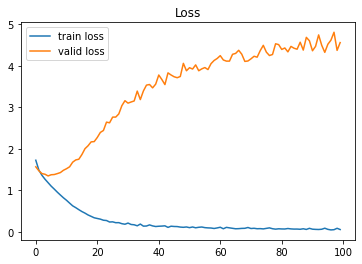

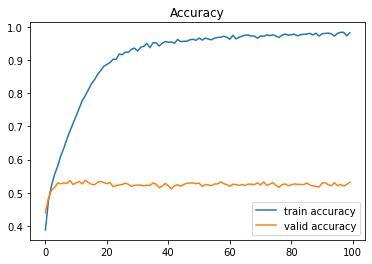

In [23]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# 有運用 GPU 的執行速度是沒有用的3倍，所以有GPU對於機器學習的訓練速度真的非常重要，能省下不少時間
# 訓練結果可以看到，此模型Overfitting非常嚴重